## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

TO DO list<br>
    <li>Clean data</li>
    <li>Define metrics for popularty and quality</li>
    <li>EDA</li>
    <li>More</li>

In [16]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('datasets/office_episodes.csv')
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [3]:
# look for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [4]:
# boxplot to examine variables and to look for more hidden nulls
print(df.loc[:,('viewership_mil','votes','ratings','duration', 'scaled_ratings')].describe())
print()
print()
print('Unique values')
print(df.loc[:,('episode_number', 'season', 'director', 'writers')].nunique())

       viewership_mil         votes     ratings    duration  scaled_ratings
count      188.000000    188.000000  188.000000  188.000000      188.000000
mean         7.246330   2838.228723    8.237234   27.053191        0.511636
std          2.066012   1063.165290    0.589930    6.937254        0.184353
min          3.250000   1832.000000    6.600000   19.000000        0.000000
25%          5.990000   2187.750000    7.800000   22.000000        0.375000
50%          7.535000   2614.000000    8.200000   23.000000        0.500000
75%          8.425000   3144.250000    8.600000   30.000000        0.625000
max         22.910000  10515.000000    9.800000   60.000000        1.000000


Unique values
episode_number    188
season              9
director           54
writers            47
dtype: int64


In [60]:
# create new features column
# constant list of colors and categories to be assigned
SCALED_RATING_COLORS = ["red", "orange", "lightgreen", "green"]
SCALED_RATING_CAT = ["0.00 - 0.25","0.25 - 0.50","0.50 - 0.75","0.75 - 1"] 
# create list according to criteria
scaled_rating_color = []
scaled_rating_category = []
for scaled_rating in df['scaled_ratings']:
    if scaled_rating < 0.25:
        scaled_rating_color.append(SCALED_RATING_COLORS[0])
        scaled_rating_category.append(SCALED_RATING_CAT[0])
    elif scaled_rating < 0.50:
        scaled_rating_color.append(SCALED_RATING_COLORS[1])
        scaled_rating_category.append(SCALED_RATING_CAT[1])
    elif scaled_rating < 0.75:
        scaled_rating_color.append(SCALED_RATING_COLORS[2])
        scaled_rating_category.append(SCALED_RATING_CAT[2])
    else:
        scaled_rating_color.append(SCALED_RATING_COLORS[3])
        scaled_rating_category.append(SCALED_RATING_CAT[3])
# add to df
df['scaled_rating_color'] = pd.Series(scaled_rating_color)
df['scaled_rating_category'] = pd.Series(scaled_rating_category)
df['scaled_rating_category'] = pd.Categorical(df['scaled_rating_category'], \
                                categories=SCALED_RATING_CAT, ordered=True)

In [61]:
# marker size
marker_size = []
for has_guest in df['has_guests']:
    if has_guest:
        marker_size.append(250)
    else:
        marker_size.append(25)
df['marker_size'] = pd.Series(marker_size)

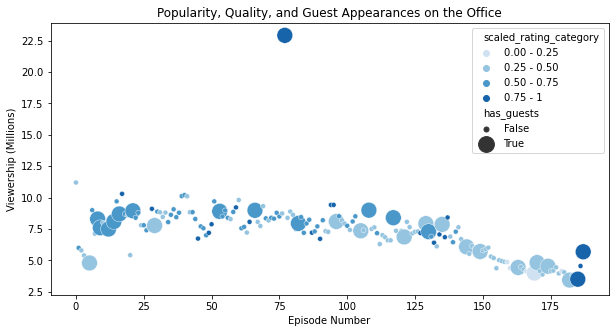

In [62]:
# plot using seaborn

fig, ax = plt.subplots(1,figsize=(10, 5))
_ = sns.scatterplot(ax=ax, data=df, x='episode_number', y='viewership_mil', hue='scaled_rating_category', palette='Blues', \
    size='has_guests', sizes=[25,250])
_ = ax.set(title="Popularity, Quality, and Guest Appearances on the Office",\
    xlabel='Episode Number', ylabel='Viewership (Millions)')
plt.show()


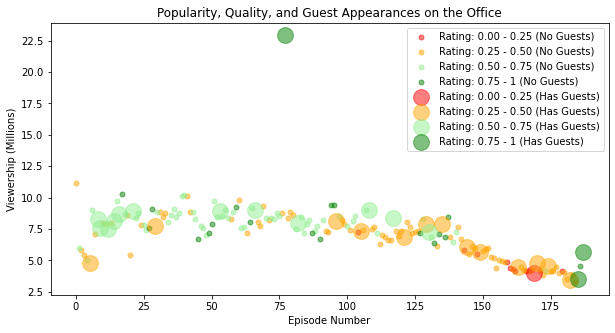

In [78]:
# plot using matplotlib
fig = plt.figure(figsize=(10,5))
# slice by marker size
for marker_size in sorted(df.marker_size.unique()):
    # slice df using marker_size
    temp_df_by_size = df[df.marker_size == marker_size]
    # slice df using category and plot each
    # do first for episodes with no guests
    for cat, color in zip(SCALED_RATING_CAT,SCALED_RATING_COLORS):
        temp_df_by_cat = temp_df_by_size[temp_df_by_size.scaled_rating_category == cat]
        _ = plt.scatter(temp_df_by_cat['episode_number'], temp_df_by_cat['viewership_mil'], s=marker_size, \
            c=color, alpha=0.5)
# beautify
leg = []
for has_guest in ['No Guests', 'Has Guests']:
    for c in SCALED_RATING_CAT:
        leg.append('Rating: {} ({})'.format(c, has_guest))
_ = plt.legend(leg)
_ = plt.title("Popularity, Quality, and Guest Appearances on the Office")
_ = plt.xlabel('Episode Number')
_ = plt.ylabel('Viewership (Millions)')
plt.show()

In [ ]:
# find topstar